## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, levene, pearsonr, ttest_1samp 

In [2]:
#Abrir archivo
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Mostrar nombre de columnas para verificar estructura
df_columns = df.columns
print(df_columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [5]:
#Mostrar ultimas filas
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
#Estadisticas basicas
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Preparar los datos

In [7]:
df.columns = [col.lower() for col in df.columns]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Verificacion valores nulos
df_missing = df.isnull().sum()
print(df_missing[df_missing>0])

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [9]:
#Verificacion duplicados
df.duplicated().sum()

0

In [10]:
#Resolver TBD
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [11]:
#Los valores tbd los remplazo por Nan, que tratare en el siguiente paso. 
df['user_score'] = df['user_score'].replace('tbd', np.nan)  # Reemplaza 'tbd' por NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  # Convierte a numérico

## Conversion tipo de datos

In [12]:
#llenar valores nulos
#1) columna name
df['name'].fillna('unknow', inplace=True)
#2) columna year_of_release, utilizo la mediana porque tiene mas sentido tomar el dato del 
#medio que sacar un promedio de los años.
df['year_of_release'].fillna(df['year_of_release'].median(), inplace=True)
#3) columna genre, dado que esta vacio, para facilitar el tratamiento lo pongo como desconocido
df['genre'].fillna('unknow', inplace=True)
#4) columna critic_score, utilizo el promedio aritmetico que como medida de tendencia central, 
#recoge la dispersion de los datos
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)
#5) columna user_score, utilizo el promedio aritmetico que como medida de tendencia central, 
#recoge la dispersion de los datos
df['user_score'].fillna(df['user_score'].mean(), inplace=True)
#6) columna rating, utilizare la moda porque es el dato que mas se repite, esto reflejara la puntuacion
#de la mayoria de las calificaciones.
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [13]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.492911,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.829925,0.813604,0.503339,0.308853,0.186731,9.724580,1.010753
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,7.125046
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,7.125046
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [15]:
#Ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## paso 3

In [16]:
#Juegos lanzados por periodo
juegos_periodo = df['year_of_release'].value_counts().sort_index()
print(juegos_periodo)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


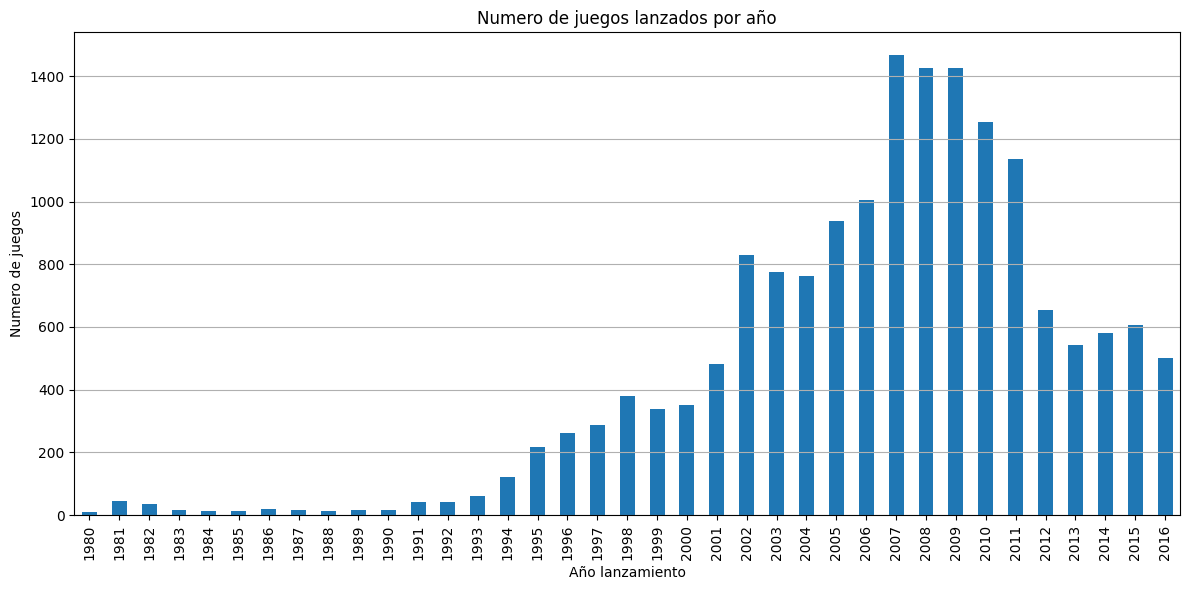

In [17]:
#Grafico de barras
juegos_periodo.plot(kind='bar', figsize=(12,6))
plt.title('Numero de juegos lanzados por año')
plt.xlabel('Año lanzamiento')
plt.ylabel('Numero de juegos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
#Ventas por plataforma acumulado
ventas_plataforma_total = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_plataforma_total)
print("Media:",ventas_plataforma_total.mean())
print(ventas_plataforma_total.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64
Media: 287.6035483870954
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [19]:
#Ventas por plataforma por periodo
ventas_plataforma = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(ventas_plataforma)
print(df['platform'].unique())

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        28.88
3       2600             1983         5.84
4       2600             1984         0.27
..       ...              ...          ...
239       XB             2008         0.18
240     XOne             2013        18.96
241     XOne             2014        54.07
242     XOne             2015        60.14
243     XOne             2016        26.15

[244 rows x 3 columns]
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


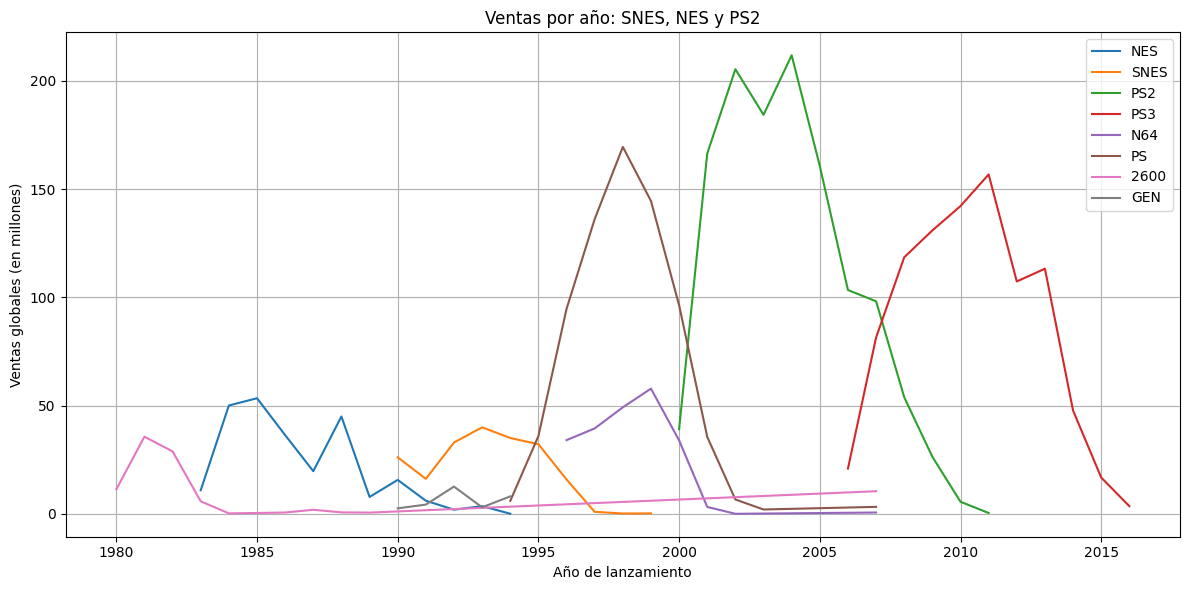

In [20]:
#Filtro por plataforma, plataforma antigua (segun mi conocimiento limitado de videojuegos)

df_NES = df[df['platform'] == 'NES'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_SNES = df[df['platform'] == 'SNES'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_ps2 = df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_PS3 = df[df['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_N64 = df[df['platform'] == 'N64'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_PS = df[df['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_2600 = df[df['platform'] == '2600'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_Gen = df[df['platform'] == 'GEN'].groupby('year_of_release')['total_sales'].sum().reset_index()

# Grafico
plt.figure(figsize=(12,6))

plt.plot(df_NES['year_of_release'], df_NES['total_sales'], label='NES')
plt.plot(df_SNES['year_of_release'], df_SNES['total_sales'], label='SNES')
plt.plot(df_ps2['year_of_release'], df_ps2['total_sales'], label='PS2')
plt.plot(df_PS3['year_of_release'], df_PS3['total_sales'], label='PS3')
plt.plot(df_N64['year_of_release'], df_N64['total_sales'], label='N64')
plt.plot(df_PS['year_of_release'], df_PS['total_sales'], label='PS')
plt.plot(df_2600['year_of_release'], df_2600['total_sales'], label='2600')
plt.plot(df_Gen['year_of_release'], df_Gen['total_sales'], label='GEN')

# Etiquetas y título
plt.title('Ventas por año: SNES, NES y PS2')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
#1)Las nuevas plataformas aparecen cada 5 años (aproximadamente)
#2)No hay un patron especifico para decir un valor central para las plataformas que desaparecen, 
#en el caso de NES tuvo ventas desde 1983 hasta 1994, en el caso de SNES tuvo ventas desde 1980 
#hasta 1998, N64 tuvo ventas desde 1997 hasta 2007. 

In [22]:
#Teniendo en cuenta el comportamiento de los datos, tomo desde el año 2006 en adelante. 
#porque las ventas se concentran mas en el segmento 2006 - 2016 y la variabilidad y heterogeneidad
#se refleja mas en este intervalo. Hay un crecimiento considerable, llamativo, pero la serie vuelve
# a disminuir. 

In [23]:
#Filtro de datos a partir de 2000
df_datos_2006 = df[df['year_of_release']>=2006]

In [24]:
df_datos_2006.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [25]:
#Plataforma lideres en ventas 2000 - 2016
ventas_plataforma_total_2006_2016 = df_datos_2006.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_plataforma_total_2006_2016.head(10))

platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.69
PS4     314.14
PS2     288.01
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
Name: total_sales, dtype: float64


se analiza el total de ventas por plataforma para el periodo 2006 - 2016
se encuentra que dentro de los primeros cinco plataformas con mayores ventas estan X360, PS3, Wii, DS, PS4.
comparado con el total general, Continuan apareciendo las mismas plataformas como lideres, a excepcion de PS que despues del 2000 disminuye sus ventas, probablemente porque empieza a ser reemplazada por consolas mas modernas.
El periodo 2007 - 2011 concentra una parte considerable de las ventas de toda la serie, los datos crecen pero vuelven a retomar valores similares a previo 2007.

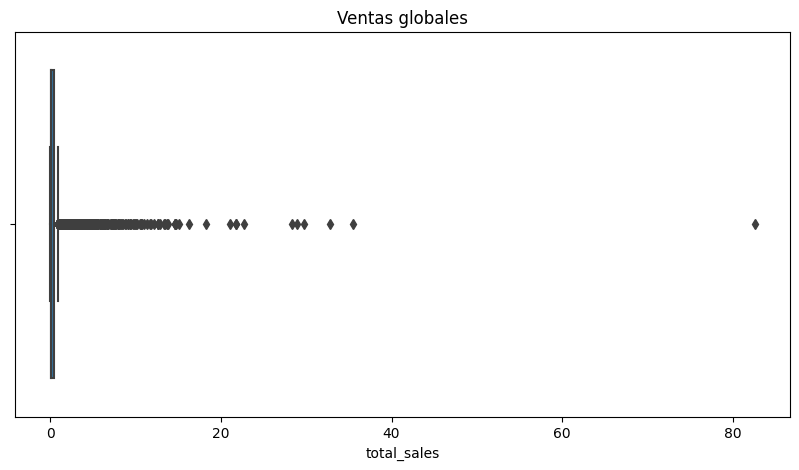

In [26]:
#Diagrama de caja
plt.figure(figsize=(10,5))
sns.boxplot(x=df_datos_2006['total_sales'])
plt.title('Ventas globales')
plt.show()

In [27]:
# Ventas promedio por plataforma
promedio = df_datos_2006.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Promedio Ventas por plataforma", promedio)

Promedio Ventas por plataforma platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.69
PS4     314.14
PS2     288.01
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
WiiU     82.19
PSV      54.07
XB       16.94
GC       13.73
GBA      13.65
2600     10.50
PS        3.28
GB        1.03
N64       0.67
DC        0.06
Name: total_sales, dtype: float64


In [28]:
# Ventas promedio por plataforma
promedio = df_datos_2006.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Mediana por plataforma
mediana = df_datos_2006.groupby('platform')['total_sales'].median().sort_values(ascending=False)

print("Promedio Ventas por plataforma", promedio)
print("Mediana Ventas por plataforma", mediana)

Promedio Ventas por plataforma platform
GB      1.030000
PS4     0.801378
X360    0.774252
PS3     0.705973
Wii     0.687508
XOne    0.645020
2600    0.617647
WiiU    0.559116
3DS     0.498077
PS      0.468571
PS2     0.343278
DS      0.327870
GBA     0.243750
GC      0.236724
N64     0.223333
PSP     0.221247
PC      0.210820
XB      0.194713
PSV     0.125744
DC      0.030000
Name: total_sales, dtype: float64
Mediana Ventas por plataforma platform
GB      1.030
2600    0.440
PS3     0.270
X360    0.270
WiiU    0.220
XOne    0.220
N64     0.200
PS4     0.200
Wii     0.190
PS      0.180
GC      0.140
PS2     0.130
3DS     0.120
DS      0.100
XB      0.090
PSP     0.080
GBA     0.075
PSV     0.055
PC      0.050
DC      0.030
Name: total_sales, dtype: float64


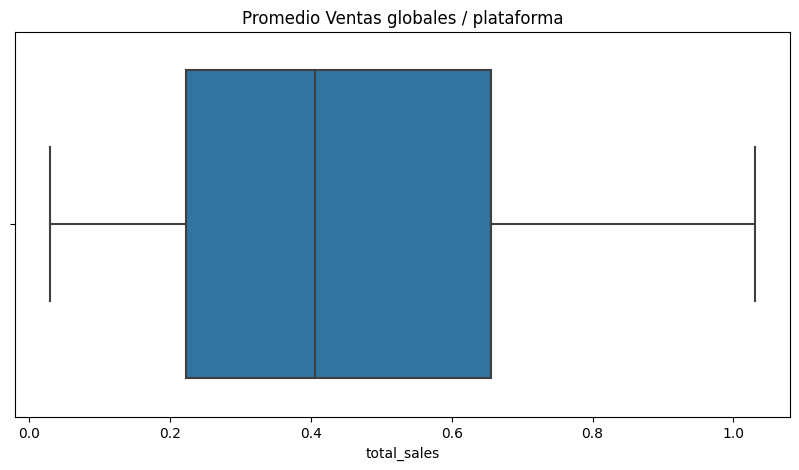

In [29]:
#Diagrama de caja / promedio
plt.figure(figsize=(10,5))
sns.boxplot(x=promedio)
plt.title('Promedio Ventas globales / plataforma')
plt.show()

A nivel de promedio se encuentra que las ventas oscilan entre 0.03 y 1.3. Hay una concentracion importante de valores entre 0.3 y 0.7 (50% de los valores), existe un 25% de los valores que son superiores a 0.7 e inferiores a 1.3. Calculado de esta forma las ventas son lideradas por GB, PS4, X360, PS3 y Wii.

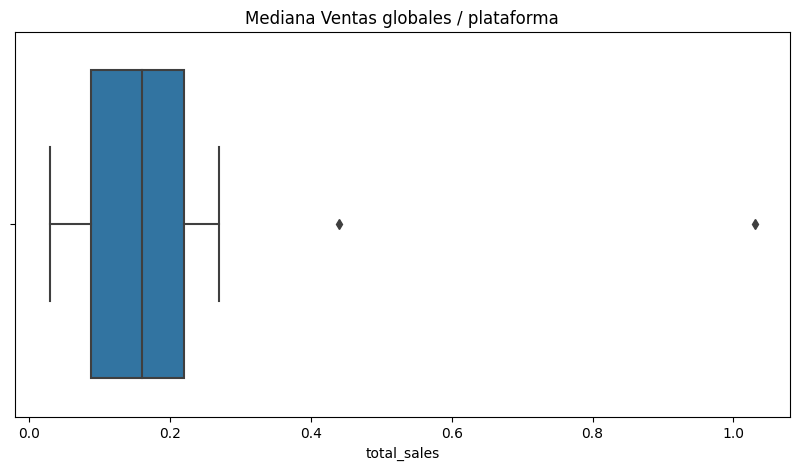

In [30]:
#Diagrama de caja / Mediana
plt.figure(figsize=(10,5))
sns.boxplot(x=mediana)
plt.title('Mediana Ventas globales / plataforma')
plt.show()

In [31]:
#Correlacion resenas y ventas para GB
PS2_sales = df_datos_2006[df_datos_2006['platform']=='PS2']
PS2_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
148,Final Fantasy XII,PS2,2006,Role-Playing,1.88,0.00,2.33,1.74,92.0,7.6,T,5.95
183,Madden NFL 2004,PS2,2007,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
196,Guitar Hero II,PS2,2006,Misc,3.81,0.63,0.00,0.68,92.0,8.5,T,5.12
208,Guitar Hero III: Legends of Rock,PS2,2007,Misc,3.49,0.01,0.01,1.48,82.0,8.2,T,4.99
241,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E,4.49


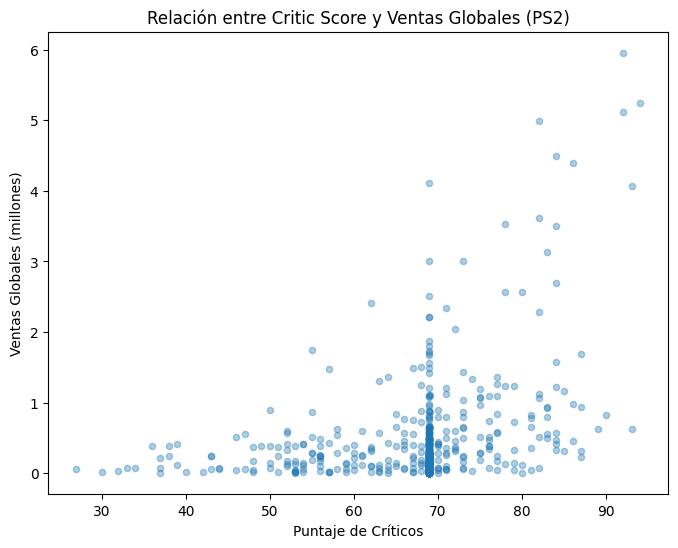

Correlacion entre Puntaje de criticos y ventas: 0.3203924907507586


In [32]:
#Puntaje criticos
PS2_sales.plot(x='critic_score', y='total_sales', kind ='scatter', alpha =0.36, title ='Relación entre Critic Score y Ventas Globales (PS2)',figsize =[8,6],xlabel ='Puntaje de Críticos', ylabel ='Ventas Globales (millones)')  
plt.show()
Ps2_corr = PS2_sales['critic_score'].corr(PS2_sales['total_sales'])
print("Correlacion entre Puntaje de criticos y ventas:", Ps2_corr)


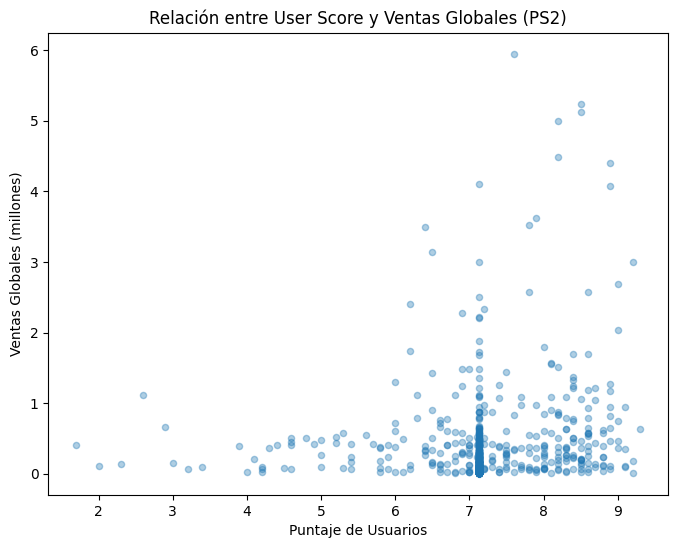

Correlacion entre Puntaje de usuarios y ventas: 0.1751346495069262


In [33]:
#Puntaje Usuarios
PS2_sales.plot(x='user_score', y='total_sales', kind ='scatter', alpha =0.36, title ='Relación entre User Score y Ventas Globales (PS2)',figsize =[8,6],xlabel ='Puntaje de Usuarios', ylabel ='Ventas Globales (millones)')  
plt.show()
Ps2_corr_2 = PS2_sales['user_score'].corr(PS2_sales['total_sales'])
print("Correlacion entre Puntaje de usuarios y ventas:", Ps2_corr_2)

In [34]:
#Juegos en varias plataformas
juegos_multiplataforma = df_datos_2006.groupby('name')['platform'].nunique()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 1].index
df_juegos_multiplataforma = df_datos_2006[df_datos_2006['name'].isin(juegos_multiplataforma)]
df_juegos_multiplataforma.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,E,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.000000,6.300000,M,14.62


In [35]:
#Filtro de un solo juego: GTA V
juego = 'Grand Theft Auto V'
df_juego = df_juegos_multiplataforma[df_juegos_multiplataforma['name']== juego]
print(df_juego[['platform', 'total_sales']].sort_values(by='total_sales', ascending=False))

     platform  total_sales
16        PS3        21.05
23       X360        16.27
42        PS4        12.62
165      XOne         5.47
1730       PC         1.17


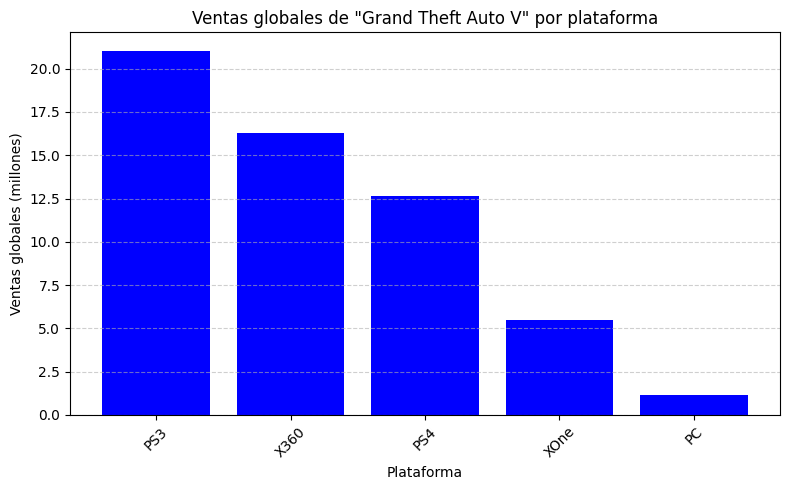

In [36]:
#Grafico de barras
plt.figure(figsize=(8,5))
plt.bar(df_juego['platform'], df_juego['total_sales'], color='blue')
plt.title(f'Ventas globales de "{juego}" por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Acerca de las ventas del juego GTA V se encuentra que el titulo esta disponible para PS3, X360, PS4, Xone y PC. En PS3 y X360 se alcanzaron las ventas mas altas.

     platform  total_sales
143       PS4         6.08
264       PS3         4.28
494      X360         2.92
754      XOne         2.18
3381      PSV         0.60
3611      Wii         0.56
4279      3DS         0.46
6097       PC         0.29


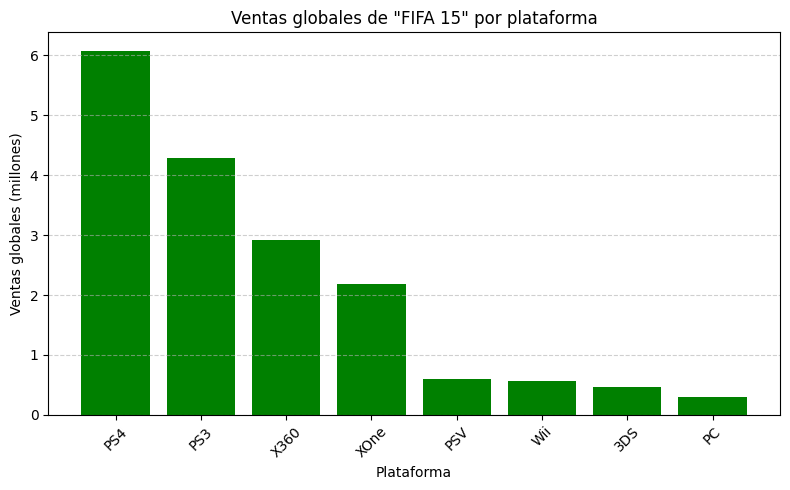

In [37]:
#Filtro de un solo juego: FIFA 15
juego = 'FIFA 15'
df_juego = df_juegos_multiplataforma[df_juegos_multiplataforma['name']== juego]
print(df_juego[['platform', 'total_sales']].sort_values(by='total_sales', ascending=False))
plt.figure(figsize=(8,5))
plt.bar(df_juego['platform'], df_juego['total_sales'], color='green')
plt.title(f'Ventas globales de "{juego}" por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Acerca de las ventas del juego FIFA 15 se encuentra que el titulo esta disponible para PS3, PS4, X360, Xone, PSV, Wii, 3DS y PC. En PS4 y PS3 se alcanzaron las ventas mas altas.

genre
Action          1144.30
Sports           815.45
Shooter          728.13
Misc             567.08
Role-Playing     525.88
Racing           304.18
Platform         281.96
Simulation       222.66
Fighting         193.29
Adventure        145.61
Puzzle            92.60
Strategy          74.80
Name: total_sales, dtype: float64


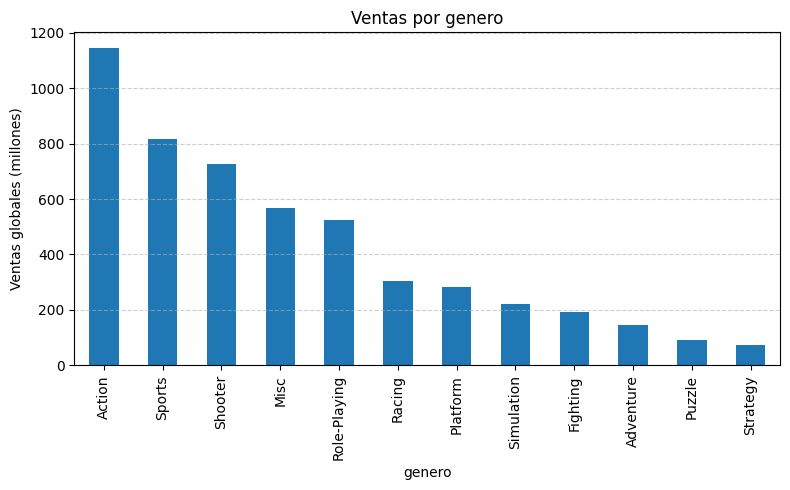

In [38]:
#Ventas por genero
ventas_genero = df_datos_2006.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(ventas_genero)
plt.figure(figsize=(8,5))
ventas_genero.plot(kind='bar')
plt.title('Ventas por genero')
plt.xlabel('genero')
plt.ylabel('Ventas globales (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Los generos con las ventas mas altas son Action, Sports, Shooter. La generalizacion la hago a la luz de los datos disponibles. En el periodo evaluado, los tres generos mencionados anteriormente son los que tienen el nivel de ventas mas alto. El mas bajo correpsonde a Adventure, Puzzle y Strategy.

## Paso 4

In [39]:
#perfiles de usuario por region
#Ventas
ventas_region = df_datos_2006.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()

#Ventas por region
total_na = ventas_region['na_sales'].sum()
total_eu = ventas_region['eu_sales'].sum()
total_jp = ventas_region['jp_sales'].sum()

#Participacion porcentual
ventas_region['na_cuota'] = (ventas_region['na_sales'] / total_na)*100
ventas_region['eu_cuota'] = (ventas_region['eu_sales'] / total_na)*100
ventas_region['jp_cuota'] = (ventas_region['jp_sales'] / total_na)*100

#Plataformas por region
top_na = ventas_region.sort_values('na_sales', ascending=False).head(5)
top_eu = ventas_region.sort_values('eu_sales', ascending=False).head(5)
top_jp = ventas_region.sort_values('jp_sales', ascending=False).head(5)

print("Top 5 plataformas en NA", top_na[['na_sales','na_cuota']].round(2))
print("-------------------")
print("Top 5 plataformas en EU", top_eu[['eu_sales','eu_cuota']].round(2))
print("-------------------")
print("Top 5 plataformas en JP", top_jp[['jp_sales','jp_cuota']].round(2))

Top 5 plataformas en NA           na_sales  na_cuota
platform                    
X360        595.57     24.35
Wii         496.90     20.32
PS3         393.49     16.09
DS          326.08     13.33
PS2         125.81      5.14
-------------------
Top 5 plataformas en EU           eu_sales  eu_cuota
platform                    
PS3         330.29     13.50
X360        270.33     11.05
Wii         262.21     10.72
DS          143.47      5.87
PS4         141.09      5.77
-------------------
Top 5 plataformas en JP           jp_sales  jp_cuota
platform                    
DS          142.04      5.81
3DS         100.67      4.12
PS3          80.19      3.28
PSP          71.53      2.92
Wii          69.33      2.83


Para la plataforma X360, tiene la mayor participacion en NA con 24,35% de la cuota de mercado, en EU ocupa el segundo lugar con 11,05% y en JP no hace parte del top 5.
La plataforma Wii ocupa el segundo lugar en NA con un 20,3%, en EU ocupa el tercer puesto con 10,5% yen JP el 5 lugar con 2,83%.
En cuanto a la plataforma PS3, en NA ocupa el tercer lugar con un 16,09% de la cuota de mercado, en EU ocupa el primer lugar con el 13,5% de ventas y en JP ocupa el tercer lugar con 3,28%.
Sobre DS, en NA ocupa el cuarto lugar con 13,3% de ventas, en EU tambien ocupa el cuarto lugar con 5,87% de cuota de mercado y en JP ocupa el primer puesto con 5,81%.
Finalmente, la consola PS2 ocupa el quinto puesto en NA, en EU y JP no tiene participacion.


In [40]:
#Generos principales
genero_region = df_datos_2006.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()

#Ventas por genero region
top_genero_na = genero_region.sort_values('na_sales', ascending=False).head(5)
top_genero_eu = genero_region.sort_values('eu_sales', ascending=False).head(5)
top_genero_jp = genero_region.sort_values('jp_sales', ascending=False).head(5)

print("Top 5 generos en NA", top_genero_na[['na_sales']].round(2))
print("-------------------")
print("Top 5 generos en EU", top_genero_eu[['eu_sales']].round(2))
print("-------------------")
print("Top 5 generos en JP", top_genero_jp[['jp_sales']].round(2))

Top 5 generos en NA               na_sales
genre                 
Action          546.28
Sports          409.87
Shooter         380.54
Misc            292.76
Role-Playing    200.40
-------------------
Top 5 generos en EU          eu_sales
genre            
Action     358.84
Sports     257.01
Shooter    241.71
Misc       149.02
Racing     115.41
-------------------
Top 5 generos en JP               jp_sales
genre                 
Role-Playing    172.40
Action          103.36
Misc             65.62
Sports           49.58
Platform         35.32


El genero Action tiene una participacion significativa en las tres regiones, en NA tiene el primer lugar con 546 M, en EU primer lugar con 358 M y en JP el segundo lugar con 103 M.
El genero Sport tambien tiene un peso considerable en la cuota de mercado, para NA ocupa el segundo lugar con 409 M, EU el segundo lugar con 257 M y en JP el cuarto lugar con 49,5 M.
el genero Role-Playing ocupa el quinto lugar en NA, en EU no tiene ventas y en JP el primer puesto.
En todos los casos es llamativo ver la diferencia en el tamaño del mercado: NA, EU, JP respectivamente.


In [41]:
#Clasificaciones
clasificacion_region = df_datos_2006.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()

#Ventas por genero region
top_clasificacion_na = clasificacion_region.sort_values('na_sales', ascending=False).head(5)
top_clasificacion_eu = clasificacion_region.sort_values('eu_sales', ascending=False).head(5)
top_clasificacion_jp = clasificacion_region.sort_values('jp_sales', ascending=False).head(5)

print("Top 5 generos en NA", top_clasificacion_na[['na_sales']].round(2))
print("-------------------")
print("Top 5 generos en EU", top_clasificacion_eu[['eu_sales']].round(2))
print("-------------------")
print("Top 5 generos en JP", top_clasificacion_jp[['jp_sales']].round(2))

Top 5 generos en NA         na_sales
rating          
E        1105.07
M         579.92
T         436.29
E10+      323.22
EC          1.32
-------------------
Top 5 generos en EU         eu_sales
rating          
E         698.31
M         402.87
T         240.68
E10+      178.52
RP          0.08
-------------------
Top 5 generos en JP         jp_sales
rating          
E         402.39
T          84.60
M          44.45
E10+       36.57
EC          0.00


Sobre la clasificacion ESRB se encuentran:

La clasificacion E lidera la porcion de mercado en las tres regiones, dado que son juegos para todo publico.
La clasificacion M ocupa el segundo lugar en NA y EU y el tercero lygar en JP.
la clasificacion T ocupa el tercero lugar en NA y EU y el segundo lugar en JP.
La clasificacion E10+ ocupa el cuarto lugar en las tres regiones. Hay una relacion entre la clasificacion y el volumen de ventas.


## Paso 5

In [42]:
#Xbox One y pC calificaciones
xone_calificacion = df_datos_2006[df_datos_2006['platform'] == 'XOne']['user_score']
pc_calificacion = df_datos_2006[df_datos_2006['platform'] == 'PC']['user_score']

#igualdad varianzas

stat_levene, p_levene = levene(xone_calificacion, pc_calificacion)
print("Estadistico Levene:", stat_levene, "p_levene:", p_levene)

alpha = 0.05
if p_levene < alpha: 
    print("Las varianzas son diferentes")
    equal_var = False
else:
    print("Las varianzas son iguales")
    equal_var = True

#Prueba t
#Hipotesis nula:Las calificaciones promedio de los usuarios para las plataformas 
#Xbox One y PC son las mismas. 
#Hipotesis alterna:Las calificaciones promedio de los usuarios para las plataformas 
#Xbox One y PC son diferentes. 

t_stat, p_value = ttest_ind(xone_calificacion, pc_calificacion, equal_var=equal_var)
print("T-test:", t_stat, "p-valor:",p_value)


#Interpretacion, si p_value < alpha, rechaza hipotesis nula, si p_value> alpha acepta hipotesis nula
if p_value < alpha:
    print('Rechazamos hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.')
else:
    print('No se puede rechazar hipotesis nula')  

Estadistico Levene: 2.5193806842825053 p_levene: 0.1127592927863935
Las varianzas son iguales
T-test: -2.1898675771043785 p-valor: 0.028755808537926655
Rechazamos hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


In [43]:
#Calificaciones usuarios para Accion y Deportes
accion_calificacion = df_datos_2006[df_datos_2006['genre'] == 'Action']['user_score']
deportes_calificacion = df_datos_2006[df_datos_2006['genre'] == 'Sports']['user_score']

#igualdad varianzas

stat_levene, p_levene = levene(accion_calificacion, deportes_calificacion)
print("Estadistico Levene:", stat_levene, "p_levene:", p_levene)

alpha = 0.05
if p_levene < alpha: 
    print("Las varianzas son diferentes")
    equal_var = False
else:
    print("Las varianzas son iguales")
    equal_var = True

#prueba t

stat, p_value = ttest_ind(accion_calificacion, deportes_calificacion, equal_var=equal_var)
print("T-test:", t_stat, "p-valor:",p_value)

#Hipotesis nula:Las calificaciones promedio de los usuarios para los géneros de 
#Acción y Deportes son diferentes.

#Hipotesis alterna:Las calificaciones promedio de los usuarios para los 
#géneros de Acción y Deportes son diferentes. 


#Interpretacion, si p_value < alpha, rechaza hipotesis nula, si p_value> alpha acepta hipotesis nula
print(p_value)
if p_value < alpha:
    print('Rechazamos hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
else:
    print('No se puede rechazar hipotesis nula') 

Estadistico Levene: 12.798943174014406 p_levene: 0.00035120319792593564
Las varianzas son diferentes
T-test: -2.1898675771043785 p-valor: 3.002985974377165e-08
3.002985974377165e-08
Rechazamos hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


## Paso 6

Conclusion general:

Las nuevas plataformas aparecen cada 5 años (aproximadamente). No hay un patron especifico para decir un valor central para las plataformas que desaparecen,en el caso de NES tuvo ventas desde 1983 hasta 1994, en el caso de SNES tuvo ventas desde 1980 hasta 1998, N64 tuvo ventas desde 1997 hasta 2007.
Analizando el total de ventas por plataforma para el periodo 2006 - 2016, se encuentra que dentro de los primeros cinco plataformas con mayores ventas estan X360, PS3, Wii, DS, PS4. comparado con el total general, Continuan apareciendo las mismas plataformas como lideres, a excepcion de PS que despues del 2000 disminuye sus ventas, probablemente porque empieza a ser reemplazada por consolas mas modernas. El periodo 2007 - 2011 concentra una parte considerable de las ventas de toda la serie, los datos crecen pero vuelven a retomar valores similares a previo 2007.
A nivel de promedio se encuentra que las ventas oscilan entre 0.03 y 1.3. Hay una concentracion importante de valores entre 0.3 y 0.7 (50% de los valores), existe un 25% de los valores que son superiores a 0.7 e inferiores a 1.3. Calculado de esta forma las ventas son lideradas por GB, PS4, X360, PS3 y Wii.
Los generos con las ventas mas altas son Action, Sports, Shooter. La generalizacion la hago a la luz de los datos disponibles. En el periodo evaluado, los tres generos mencionados anteriormente son los que tienen el nivel de ventas mas alto. El mas bajo correpsonde a Adventure, Puzzle y Strategy.
Para la plataforma X360, tiene la mayor participacion en NA con 24,35% de la cuota de mercado, en EU ocupa el segundo lugar con 11,05% y en JP no hace parte del top 5. La plataforma Wii ocupa el segundo lugar en NA con un 20,3%, en EU ocupa el tercer puesto con 10,5% yen JP el 5 lugar con 2,83%. En cuanto a la plataforma PS3, en NA ocupa el tercer lugar con un 16,09% de la cuota de mercado, en EU ocupa el primer lugar con el 13,5% de ventas y en JP ocupa el tercer lugar con 3,28%. Sobre DS, en NA ocupa el cuarto lugar con 13,3% de ventas, en EU tambien ocupa el cuarto lugar con 5,87% de cuota de mercado y en JP ocupa el primer puesto con 5,81%. Finalmente, la consola PS2 ocupa el quinto puesto en NA, en EU y JP no tiene participacion.
El genero Action tiene una participacion significativa en las tres regiones, en NA tiene el primer lugar con 546 M, en EU primer lugar con 358 M y en JP el segundo lugar con 103 M.El genero Sport tambien tiene un peso considerable en la cuota de mercado, para NA ocupa el segundo lugar con 409 M, EU el segundo lugar con 257 M y en JP el cuarto lugar con 49,5 M. el genero Role-Playing ocupa el quinto lugar en NA, en EU no tiene ventas y en JP el primer puesto. En todos los casos es llamativo ver la diferencia en el tamaño del mercado: NA, EU, JP respectivamente.
